# Chapter 3: Describing Data with Statistics

## Programming Challenges

### \#3: Experiment with Other CSV Data

関数定義

In [2]:
from collections import Counter


# Calculating the mean
def calculate_mean(numbers):
    return sum(numbers) / len(numbers)


# Calculating the median
def calculate_median(numbers):
    s = len(numbers)
    numbers.sort()

    m = s // 2

    if s % 2 == 0:
        median = sum(numbers[m - 1 : m + 1]) / 2
    else:
        median = numbers[m]

    return median


# Calculating the mode
def calculate_mode(numbers):
    numbers_freq = Counter(numbers).most_common()
    max_count = numbers_freq[0][1]

    return [i[0] for i in numbers_freq if i[1] == max_count]


def find_differences(numbers):
    mean = calculate_mean(numbers)
    return [num - mean for num in numbers]


# Find the variance and standard deviation of a list of numbers
def calculate_variance(numbers):
    return sum([x ** 2 for x in find_differences(numbers)]) / len(numbers)

CSV ファイルの読み込みと人工のグラフを描画

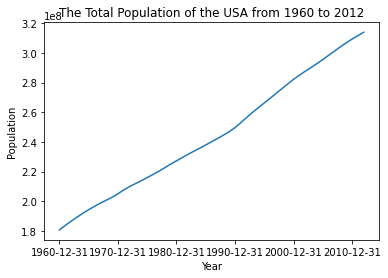

In [31]:
import csv

import matplotlib.pyplot as plt


def read_csv():
    with open("chap3_USA_SP_POP_TOTL.csv") as f:
        reader = csv.reader(f)
        next(reader)
        data = [row for row in reader]
        return [row[0] for row in data], [float(row[1]) for row in data]


dates, populations = read_csv()
dates.reverse()
populations.reverse()

# The Total Population of the USA from 1960 to 2012
fig, ax = plt.subplots()
ax.set_title("The Total Population of the USA from 1960 to 2012")
ax.plot(dates, populations)
ax.set_xlabel("Year")
ax.set_ylabel("Population")
ax.set_xticks(list(range(0, len(populations), 10)))
plt.show()

人口増加の変動

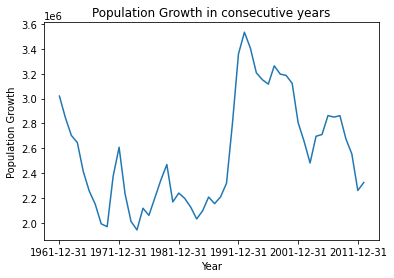

Mean: 2,562,366.15
Median: 2,476,370.00
Variance: 188,985,554,755.28
Standard Deviation: 434,724.69


In [35]:
diffs = [p2 - p1 for p1, p2 in zip(populations, populations[1:])]

# The Total Population of the USA from 1960 to 2012
fig, ax = plt.subplots()
ax.set_title("Population Growth in consecutive years")
ax.plot(dates[1:], diffs)
ax.set_xlabel("Year")
ax.set_ylabel("Population Growth")
ax.set_xticks(list(range(0, len(populations), 10)))
plt.show()

print("Mean: {0:,.2f}".format(calculate_mean(diffs)))
print("Median: {0:,.2f}".format(calculate_median(diffs)))
print("Variance: {0:,.2f}".format(calculate_variance(diffs)))
print("Standard Deviation: {0:,.2f}".format(calculate_variance(diffs) ** 0.5))